## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [1]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

penguins = sns.load_dataset("penguins")

In [2]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [3]:
penguins = penguins.fillna(penguins['body_mass_g'].mean())

penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])

In [4]:
features = ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=10)

In [5]:
predictions = dt.predict(penguins_train[features])

In [6]:
# De accuracy van de training set is hoger dan van de test set. Dit was te verwachten, want het model is getrained op de traning set. 
# Het model heeft de test set nog niet vaak gezien, waardoor de accuracy daar lager is. 

predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7916666666666666
Accuracy on test set 0.7019230769230769


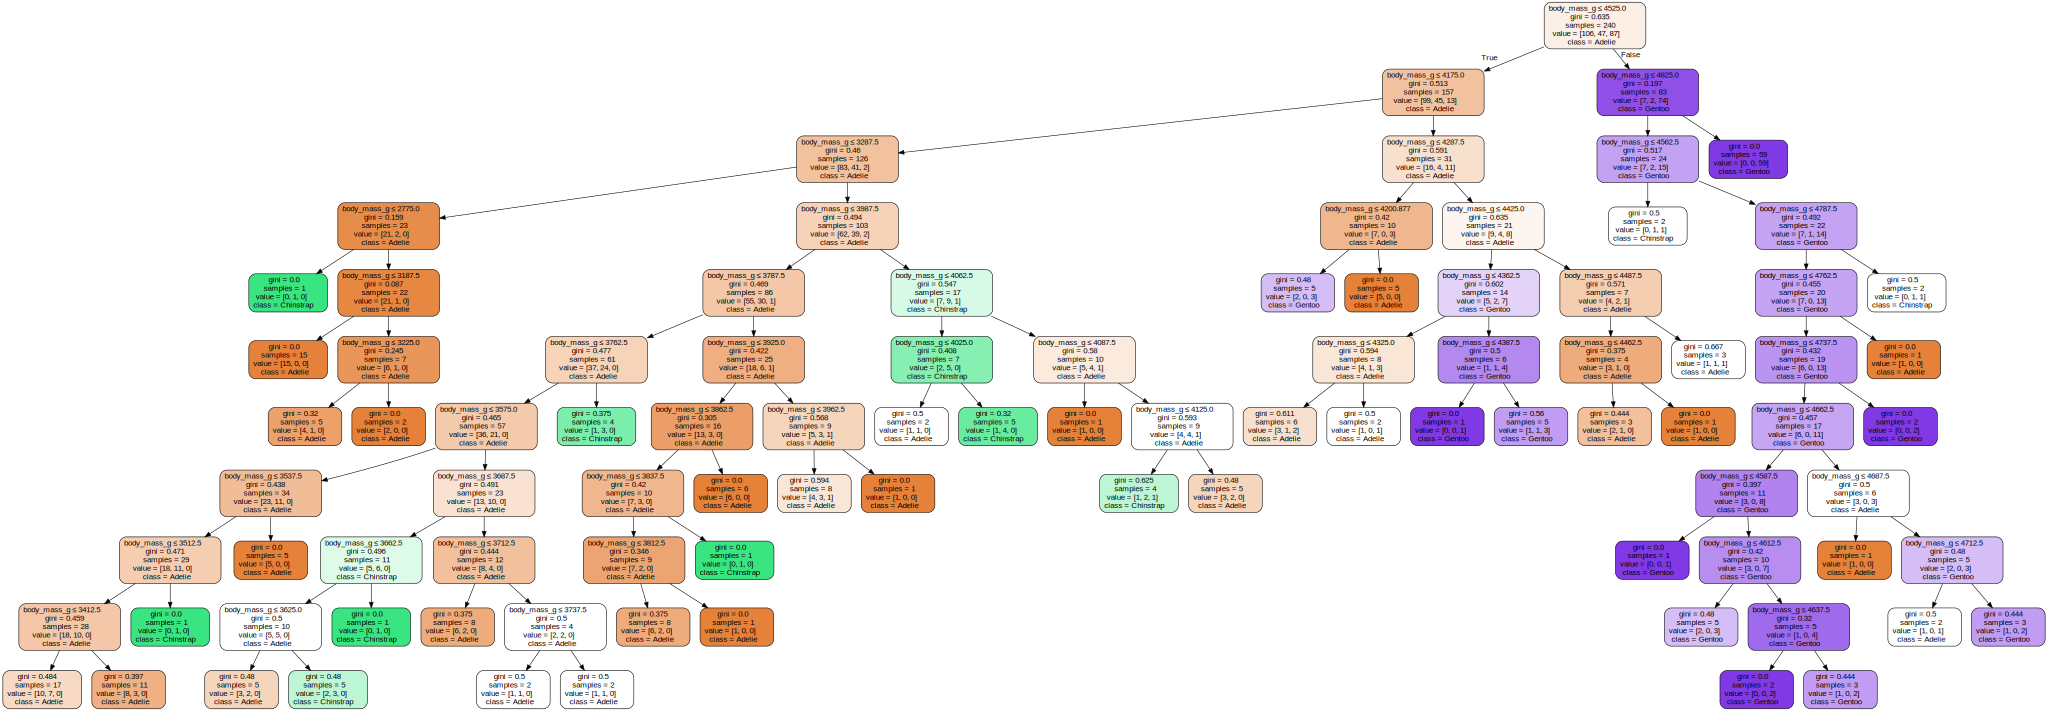

In [7]:
plot_tree_classification(dt, features, np.sort(penguins.species.unique()))